In [1]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os


In [2]:
start = dt.datetime(2017,1,1)



stockList = ['^BVSP','JBSS3.SA']

df = pd.DataFrame()
df_aux = pd.DataFrame()
for i in stockList:
    df_aux = web.DataReader(i, 'yahoo', start)
    nome_coluna = []
    for x in df_aux.columns:
        nome_coluna.append(str(i)+'_'+str(x))
    df_aux.columns=nome_coluna
    df = pd.concat([df, df_aux], axis=1)

In [3]:
df['prediction'] = df['JBSS3.SA_Adj Close'].shift(-1)
df.dropna(inplace=True)
X = df.drop(['prediction'], 1)
Y = np.array(df['prediction'])
#X_proc = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

In [4]:
#Performing the Regression on the training data
clf = RandomForestRegressor(max_depth=50, random_state=0,n_estimators=100, n_jobs = -1)
clf.fit(X_train, Y_train)
prediction = (clf.predict(X))

print('Score train {}'.format(clf.score(X_train,Y_train)))
print('Score test {}'.format(clf.score(X_test,Y_test)))
print('Score full {}'.format(clf.score(X,Y)))

Score train 0.9992045298839938
Score test 0.9901410931142961
Score full 0.9921152020610341


In [11]:
num_days = -1
df['pred'] = prediction
df['prediction'] = df['prediction'].shift(+num_days)
df['pred'] = df['pred'].shift(+num_days)
df['Data'] = df.index
df.tail()

,^BVSP_High,^BVSP_Low,^BVSP_Open,^BVSP_Close,^BVSP_Volume,^BVSP_Adj Close,JBSS3.SA_High,JBSS3.SA_Low,JBSS3.SA_Open,JBSS3.SA_Close,JBSS3.SA_Volume,JBSS3.SA_Adj Close,prediction,pred,Data
Date,,,,,,,,,,,,,,,
2019-09-16,104005.0,102782.0,103496.0,103680.0,6038700.0,103680.0,31.070000,29.209999,29.900000,29.740000,17274400.0,29.740000,28.60,29.2846,2019-09-16
2019-09-17,104619.0,103079.0,103680.0,104617.0,4574900.0,104617.0,30.320000,29.330000,29.950001,29.549999,16900000.0,29.549999,29.10,29.6489,2019-09-17
2019-09-18,104762.0,103684.0,104616.0,104532.0,3882100.0,104532.0,29.790001,29.000000,29.400000,29.459999,11343200.0,29.459999,29.83,29.5658,2019-09-18
2019-09-19,106001.0,104286.0,104555.0,104339.0,4915800.0,104339.0,30.160000,29.290001,29.600000,29.639999,12038800.0,29.639999,29.74,29.1894,2019-09-19
2019-09-20,105045.0,103914.0,104339.0,104817.0,6769100.0,104817.0,31.200001,29.969999,30.270000,30.900000,23694600.0,30.900000,NaN,NaN,2019-09-20


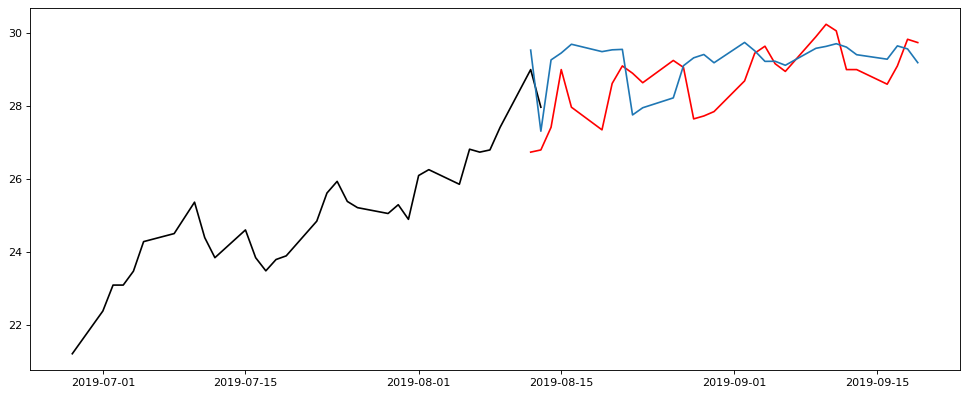

In [12]:
last_x_days = 30
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['Data'].iloc[-last_x_days*2:-last_x_days+2], df['JBSS3.SA_Adj Close'].iloc[-last_x_days*2:-last_x_days+2], color = 'black')
plt.plot(df['Data'].iloc[-last_x_days:], df['prediction'].iloc[-last_x_days:], color = 'red')
plt.plot(df['Data'].iloc[-last_x_days:], df['pred'].iloc[-last_x_days:])
plt.show()

In [39]:
feature = clf.feature_importances_
for x,y in zip(X.columns,feature):
    print(x,' ',y*100)

^BVSP_High   0.03275034431997009
^BVSP_Low   0.04960105478937565
^BVSP_Open   0.04472507748623996
^BVSP_Close   0.05406547702511874
^BVSP_Volume   0.06844226473286194
^BVSP_Adj Close   0.05669481371670497
PETR4.SA_High   10.654006911123375
PETR4.SA_Low   22.60482281984742
PETR4.SA_Open   4.991672579729327
PETR4.SA_Close   21.156590264721075
PETR4.SA_Volume   0.07531175015820286
PETR4.SA_Adj Close   40.21131664235033
